# Maskinlæring

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lese dataene
iris = pd.read_csv("Datafiler/iris.csv")

### Utforsking av datasettet

In [149]:
# Skriver ut fem første linjer
iris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

## Visualiseringer
La oss først visualisere noen sammenhenger som kan gi oss noen hypoteser.

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

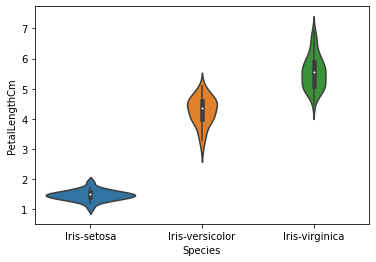

In [150]:
#sns.regplot(data=iris, x='SepalLengthCm',y="PetalLengthCm")
#sns.histplot(data=iris, x="PetalLengthCm")
#sns.jointplot(data=iris, x="SepalLengthCm", y="PetalLengthCm", hue="Species")
sns.violinplot(data=iris, x='Species', y="PetalLengthCm")

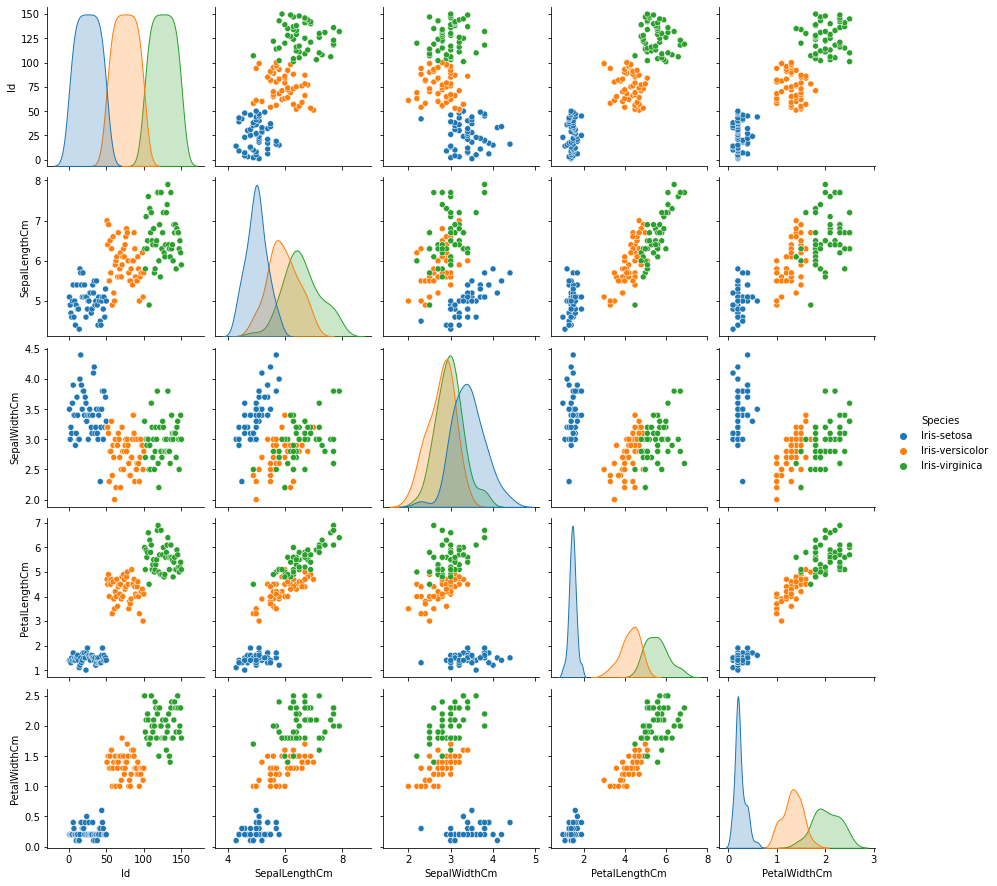

In [151]:
sns.pairplot(data=iris, hue="Species")

In [152]:
iris.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

## Maskinlæring
Plottene ovenfor kan si oss noe om at beger- og kronbladlengden for ulike irisblomstarter er forskjellig. Vi skal nå lage en modell som kan forutsi hvilken art vi har med å gjøre gitt ulike bredder og lengder av kron- og begerblad. Vi velger ut hvilke data vi ønsker å bruke som kriterium for arten, spesifiserer kategorien "species" som målkategorien vår:

In [174]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [175]:
kriterier = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # features
kategorier = iris['Species'] # labels

I maskinlæring er det viktig at modellen vår klarer å forutsi data som kommer utenfra datasettet vi trener modellen med. Derfor deler vi ofte opp dataene i et treningssett og et testsett. Treningssettet bruker vi til å trene modellen, testsettet til å teste og evaluere modellen i etterkant. Vi blander ikke disse dataene. Vi kan generere slike data med funksjonen _train\_test\_split()_. Her bruker vi 80 \% av dataene til trening og 20 \% til testing. Du bør bruke minst 70 \% av dataene dine til trening.

In [193]:
testandel = 0.2 # Andel brukt til testing
ml_data = train_test_split(kriterier, kategorier, test_size=testandel, random_state=42)

treningskriterier = ml_data[0]
testkriterier = ml_data[1]
treningskategorier = ml_data[2]
testkategorier = ml_data[3]

Nå kan vi lage modellen vår. Vi bruker en algoritme som heter _Decision Tree Classifier_. Det er basert på sammensatte og forgreinede valgtrær, der alle kombinasjoner av kriterier blir utforsket. Betingede sannsynligheter for ulike hendelser blir beregnet, og de mest sannsynlige utfallene blir framhevet basert på kombinasjonen av kriteriene. Først trener vi modellen:

In [194]:
modell = tree.DecisionTreeClassifier()
modell.fit(treningskriterier, treningskategorier)

DecisionTreeClassifier()

Det var det - da har vi en modell! Den ligger nå i et objekt som vi har kalt _modell_. La oss sjekke hvordan modellen takler testsettet vårt.

## Test og validering av modellen

In [195]:
modellkategorier_forutsett = modell.predict(testkriterier)
accuracy_score(testkategorier, modellkategorier_forutsett)

1.0

For å få bedre oversikt over hva modellen forutsier riktig og hva den feiler på, kan vi konstruere en såkalt "Confusion Matrix" (forvirringsmatrise/feilmatrise):

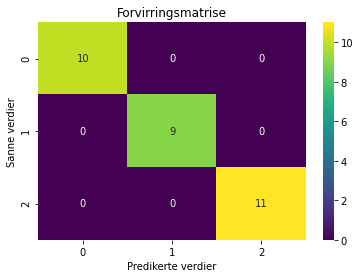

In [196]:
cm = confusion_matrix(modellkategorier_forutsett, testkategorier)

import seaborn as sns
sns.heatmap(cm, annot=True, cmap='viridis')
plt.title("Forvirringsmatrise")
plt.xlabel("Predikerte verdier")
plt.ylabel("Sanne verdier")
plt.show()

In [197]:
iris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

La oss helt til sist visualisere modellen vår.

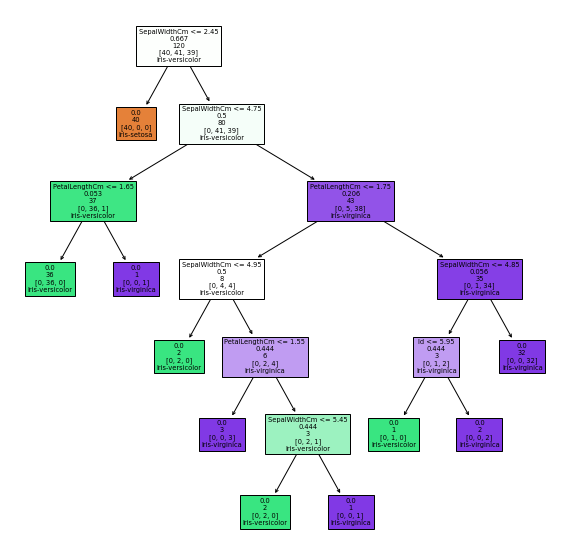

In [198]:
plt.figure(figsize=(10,10))
tree.plot_tree(modell,feature_names=iris.columns, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled=True,label=None) 
None

## KNN-modell
K-nearest neighbor.

In [199]:
from sklearn import neighbors, metrics

In [212]:
knn = neighbors.KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [213]:
knn.fit(treningskriterier, treningskategorier) # features, labels

KNeighborsClassifier(n_neighbors=20)

In [214]:
prediksjon_knn = knn.predict(testkriterier)
presisjon_knn = metrics.accuracy_score(testkategorier, prediksjon_knn)
print("Presisjon: ", presisjon_knn)

Presisjon:  1.0


In [215]:
# Bruker modellen på en tilfeldig valgt blomst
t1 = [[6.1, 2.8, 4.9, 1.1]]
#t2 = np.random.uniform(0,15,(100,4))*np.ones([100,4])
prediksjon = knn.predict(t1)
print(prediksjon)

['Iris-versicolor']


## SVM-modell
Support vector machine-modell.

In [216]:
from sklearn import svm

In [217]:
svm_modell = svm.SVC()
svm_modell.fit(treningskriterier, treningskategorier)

SVC()

In [218]:
prediksjon_svm = svm_modell.predict(testkriterier)
presisjon_svm = accuracy_score(testkategorier, prediksjon_svm)
print("Presisjon: ", presisjon_svm)

Presisjon:  1.0


## K-means cluster

In [219]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.datasets import load_breast_cancer

In [253]:
#bc = load_breast_cancer()
#x = bc.data
#y = bc.target
bc = pd.read_csv("Datafiler/brystkreft.csv")
bc.head()
bc.pop("id")

x = bc[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

diagnose = {"M": 0, "B": 1}
bc['diagnosis'] = bc['diagnosis'].map(diagnose)

y = bc['diagnosis']

In [254]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=testandel)

modell_kmeans = KMeans(n_clusters=2, random_state=42)

In [255]:
modell_kmeans.fit(x_train)

KMeans(n_clusters=2, random_state=42)

In [256]:
prediksjon_kmeans = modell_kmeans.predict(x_test)
labels = modell_kmeans.labels_
presisjon_kmeans = accuracy_score(y_test, prediksjon_kmeans)
print("Presisjon: ", presisjon_kmeans)

Presisjon:  0.8333333333333334


## Regresjonsmodeller

In [103]:
from sklearn import linear_model

In [117]:
kriterier_lr = iris[['SepalLengthCm']]# features
kategorier_lr = iris['PetalLengthCm'] # labels

ml_data_lr = train_test_split(kriterier_lr, kategorier_lr, test_size=testandel, random_state=42)

treningskriterier_lr = ml_data_lr[0]
testkriterier_lr = ml_data_lr[1]
treningskategorier_lr = ml_data_lr[2]
testkategorier_lr = ml_data_lr[3]

In [118]:
l_reg = linear_model.LinearRegression()
linreg_modell = l_reg.fit(treningskriterier_lr, treningskategorier_lr)

In [121]:
prediksjon_linreg = linreg_modell.predict(testkriterier_lr)
R2_verdi = l_reg.score(kriterier_lr, kategorier_lr)
stigning = l_reg.coef_
skjæring = l_reg.intercept_
print("Presisjon: ", R2_verdi)

Presisjon:  0.7477005779725758
